In [26]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch.unitroot import *
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Define the path to your Excel file on Google Drive
load_file = 'DL (NR) 23-24.xlsx'
load_file2= 'DL (NR) 22-23.xlsx'
merged_data= 'data.xlsx'

In [3]:
# Load your time series data into a pandas DataFrame
# Replace 'your_data.csv' with the actual file path
# merged_data= 'data.xlsx'
data= pd.read_excel(merged_data, skiprows=2, skipfooter=7)
data= data.T
data = data[3:].apply(pd.to_numeric, errors= 'coerce')
# data.index = pd.date_range(start='4/1/2022 0:00', periods=len(data), freq='1d')
# data.index.name = 'Date'
print(data.tail())
print(len(data))


                   0      1      2      3      4      5      6      7      8   \
Actual(MW).474  12.80  13.36  16.36  15.60  14.82  12.06  11.59   7.81   8.80   
Actual(MW).475  13.87  13.88   9.96  11.14  10.69  11.24  13.06  11.40  11.32   
Actual(MW).476  22.48  21.33  19.78  21.33  15.88  19.44  15.18  13.28   8.35   
Actual(MW).477  19.39  20.50  17.72  12.76  13.26  11.65   5.89   4.82   5.03   
Actual(MW).478  17.74  15.61  14.06  15.06  10.60  10.88  11.45  10.73  14.49   

                   9   ...     86     87     88     89     90     91     92  \
Actual(MW).474   9.93  ...  25.83  21.28  22.87  24.77  23.79  20.86  27.43   
Actual(MW).475  18.02  ...  24.01  29.51  21.77  22.60  18.67  19.85  20.92   
Actual(MW).476   8.49  ...  26.72  23.56  26.76  26.05  26.27  22.18  22.50   
Actual(MW).477   9.03  ...  23.18  24.87  21.02  22.10  20.08  22.28  23.80   
Actual(MW).478  12.67  ...  27.84  21.99  26.17  27.13  22.88  21.51  21.02   

                   93     94     95  


In [4]:
# Reshape the dataframe using the stack() function
df = pd.DataFrame(data.stack(dropna=False).to_frame().reset_index()[0])
print(len(df))
# df.index = pd.date_range(start='4/1/2022 0:00',  freq='15min', periods= len(df))
df['Interval'] = pd.date_range(start='4/1/2022 0:00',  freq='15min', periods= len(df))
df.index = pd.RangeIndex(1, len(df) + 1)
# df
# print("DataFrame Type:", type(df))
# print("Index Type:", type(df['Interval']))
# print("Index Frequency:", df['Interval'].freq)
df.interpolate(method='ffill', inplace=True)
df= df.dropna(axis= 0)
# print("DataFrame Type:", type(df))
# print("Index Type:", type(df.index))
# print("Index Frequency:", df.index.freq)
# df['Interval']= df.index
# df['Index'] = range(1, len(df) + 1)
df.columns = ['Value', 'Interval']
# df.index.name = ''
print(df.head())
print(len(df))
print(df.loc[1, ['Interval', 'Value']])
print("Index Type:", type(df.index))

45984
   Value            Interval
1  16.07 2022-04-01 00:00:00
2  13.75 2022-04-01 00:15:00
3  13.13 2022-04-01 00:30:00
4  10.36 2022-04-01 00:45:00
5   9.96 2022-04-01 01:00:00
45984
Interval    2022-04-01 00:00:00
Value                     16.07
Name: 1, dtype: object
Index Type: <class 'pandas.core.indexes.range.RangeIndex'>


In [5]:

# # Reset the index to have the date as a separate column
# data.reset_index(inplace=True)

# # Reshape the dataframe using the stack() function
# df = data.set_index('Date').stack().to_frame().reset_index()
# # df= data.stack().to_frame()
# # Rename the columns
# # Rename the columns
# df.columns = ['Date', 'Interval', 'Value']
# df.drop(['Date', 'Interval'], axis=1, inplace=True)
# # df.drop(['Interval'], axis=1)
# df.head()

In [6]:
# print(df.shape)
# print(df.head())
# df= df['Value']
# print(df.shape)
# print(df.columns)
# df.columns = ['Value']
# print(df.head())

In [7]:
days_in_months = [30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 23]
for i in range(len(days_in_months)):
    print(df.loc[sum(days_in_months[:i]) * (24 * 4) +1, ['Interval']])

Interval    2022-04-01 00:00:00
Name: 1, dtype: object
Interval    2022-05-01 00:00:00
Name: 2881, dtype: object
Interval    2022-06-01 00:00:00
Name: 5857, dtype: object
Interval    2022-07-01 00:00:00
Name: 8737, dtype: object
Interval    2022-08-01 00:00:00
Name: 11713, dtype: object
Interval    2022-09-01 00:00:00
Name: 14689, dtype: object
Interval    2022-10-01 00:00:00
Name: 17569, dtype: object
Interval    2022-11-01 00:00:00
Name: 20545, dtype: object
Interval    2022-12-01 00:00:00
Name: 23425, dtype: object
Interval    2023-01-01 00:00:00
Name: 26401, dtype: object
Interval    2023-02-01 00:00:00
Name: 29377, dtype: object
Interval    2023-03-01 00:00:00
Name: 32065, dtype: object
Interval    2023-04-01 00:00:00
Name: 35041, dtype: object
Interval    2023-05-01 00:00:00
Name: 37921, dtype: object
Interval    2023-06-01 00:00:00
Name: 40897, dtype: object
Interval    2023-07-01 00:00:00
Name: 43777, dtype: object


479


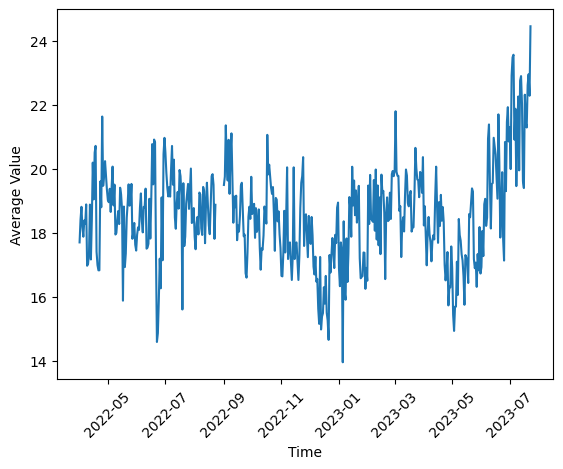

In [8]:
# Calculate the average of each day/row
data.index = pd.date_range(start='4/1/2022 0:00', periods=len(data), freq='1d')
daily_average = data.mean(axis=1)
print(len(daily_average))
# print((data.index ))
# Plot the daily average values
# Plot the daily average values
# print(data.index[-1])
plt.plot(data.index, daily_average)
plt.xlabel('Time')
# plt.xticks(data.index, [date.strftime('%m/%d') for date in data.index])
plt.ylabel('Average Value')
plt.xticks(rotation=45)
# Set the x-axis tick labels to display every nth tick
# n = 5  # Set the desired interval between ticks
# plt.xticks(np.arange(0, len(data.index), n))

plt.show()

In [9]:

# Extract the values from the DataFrame
val = np.reshape(df.values[:, 0], (-1, 1))
dates= df['Interval']
# val= df.values.reshape(df.values.shape[0], 1)
print(val.shape)
print(val[0:2])
# Shape (114, 96)
# print("We have extracted the pandas dataframe into a numpy array of shape ", values.shape)


(45984, 1)
[[16.07]
 [13.75]]


In [10]:

# # Extract the values from the DataFrame
# values = data.values
# val= df.values.reshape(df.values.shape[0], )
# print(val.shape)
# # Shape (114, 96)
# # print("We have extracted the pandas dataframe into a numpy array of shape ", values.shape)


In [11]:
# # Plot the time series data
# plt.plot(df['Value'])
# plt.title('Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()
# # Determine the order of differencing 'd' and order of ARMA terms 'p' and 'q' # Plot ACF and PACF to help identify potential values
# plot_acf(val, lags=20)
# plot_acf(df['Value'].diff(), lags=20)
# # plot_acf(df['Value'].diff().diff(), lags=20)
# plot_pacf(val, lags=20)
# plt.show()

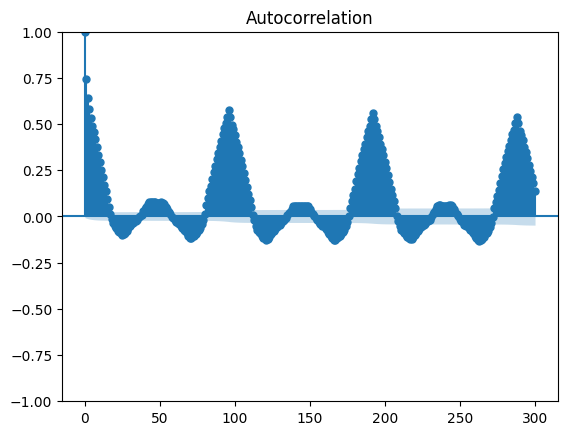

1     NaN
2   -2.32
3   -0.62
4   -2.77
5   -0.40
Name: Value, dtype: float64


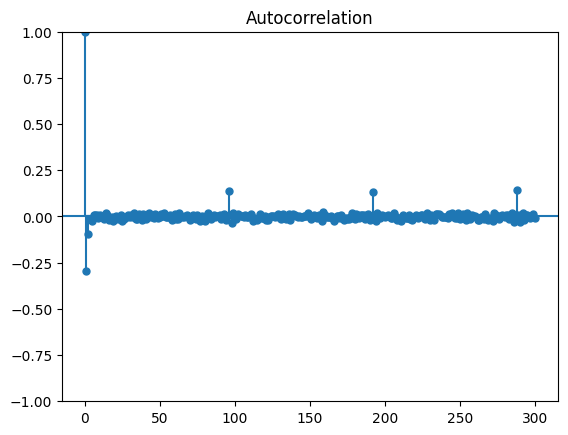

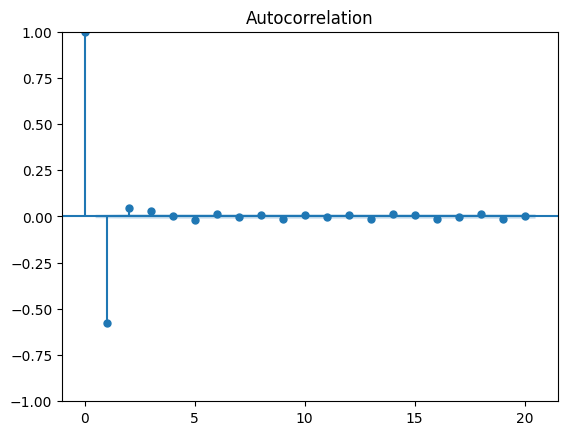

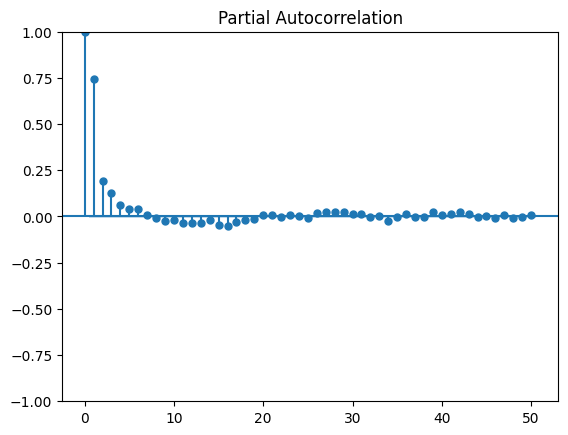

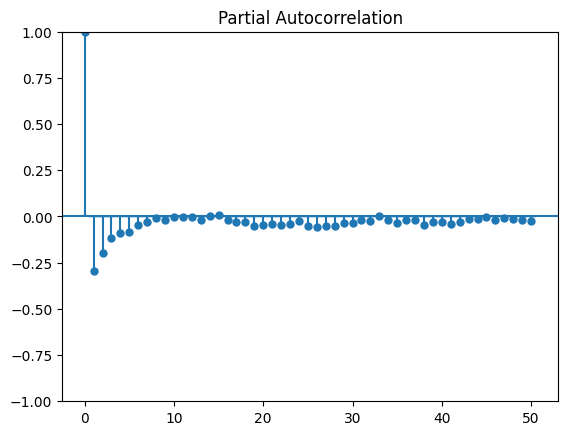

In [13]:
# Plot the time series data
# plt.plot(df['Value'])
# plt.title('Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()
# Determine the order of differencing 'd' and order of ARMA terms 'p' and 'q' # Plot ACF and PACF to help identify potential values
plot_acf(val, lags=300, alpha=0.05)
plt.show()
print(df['Value'].diff().head())# Has Nan as first value so need to remove it. 
plot_acf(df['Value'].diff().dropna(), lags=300)  # Use .dropna() to remove NaN from the first differencing. 
plt.show()
plot_acf(df['Value'].diff().dropna().diff().dropna(), lags=20)  # Use .dropna() to remove NaN from the first differencing. 
plt.show()
# SImilar. So I guess we can just use one differenced data 
# When you difference the time series (df['Value'].diff()), you are essentially transforming it into a stationary time series.
# If you still observe significant correlations in the ACF plot after differencing, it suggests that there might be a need for further
# differencing to achieve stationarity. The goal of differencing is to remove trends and make the series stationary (constant mean and variance).
# plot_acf(df['Value'].diff().diff(), lags=20)
plot_pacf(val, lags=50)
plot_pacf(df['Value'].diff().dropna(), lags=50)
plt.show()
val_diff= df['Value'].diff().dropna()
val_ddiff= df['Value'].diff().dropna().diff().dropna()

In [25]:
# print(type(val[0]))
print(len(val))
adf_ct= ADF(val.astype(float), trend='ct', max_lags= 1000)
adf_ct.summary()

45984


Test Statistic,-3.092
P-value,0.108
Lags,872


In [41]:
# print(type(val))
# print(val.shape)
val= np.reshape(val, (val.shape[0], ))
val= pd.Series(val)
# print(np.any(np.isnan(val)))
# val= np.array(val)
n_test= 2208
train= val[:-n_test]
test= val[-n_test:]
print(len(train), len(test))
T= len(val)

43776 2208


In [44]:
out= []
for p in range(3):
  for d in range(1, 3):
    for q in range(3):
      arma= ARIMA(np.asarray(train).astype(float), order= (p, d, q)).fit()
      temp= [p, d, q, arma.bic]
      out.append(temp)

res= pd.DataFrame(out, columns= ['p', 'd', 'q', 'BIC'])
res

/Users/tejasr/opt/anaconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Set the values of 'p', 'd', and 'q' based on the plots and domain knowledge p = # Autoregressive order
d = # Differencing order
q = # Moving average order
# Fit the ARIMA model
model = ARIMA(data, order=(p, d, q))
results = model.fit()
# Print model summary
print(results.summary())
# Generate forecasts

In [ ]:
forecast_steps = # Number of steps to forecast forecast = results.forecast(steps=forecast_steps) # Plot original data and forecasts
plt.plot(data, label='Original Data') 
plt.plot(forecast, label='Forecast')
plt.title('Original Data vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()